## Visualiasing Net-migration from Kenya to Australia [2009 - 2023]
- Net Overseas Migration (NOM) is the net gain or loss of population through migration to Australia and emigration from Australia.
- The NOM is the difference between the number of incoming and outgoing migrants.
-This notebook is a simple visualisation of the net migration from Kenya to Australia from 2009 to 2023. The data is obtained from the Statista [statista.com](https://www.statista.com/statistics/1003311/australia-net-overseas-migration-from-kenya/) website. The data is in the form of a CSV file. The data is visualised using the `pandas` and `matplotlib` and `seaborn` libraries.

In [2]:
# import required modules
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# set the directories
base_path = os.path.dirname(os.path.realpath("__file__"))
root_path = os.path.join(base_path, '..')
data_path = os.path.join(root_path, 'data')
images_path = os.path.join(root_path, 'images')
data_file = os.path.join(data_path, 'net_migration.csv')
data_file

'/home/brightkoech/Projects/casual-data-viz/notebooks/../data/net_migration.csv'

In [4]:
# Load the data into a pandas dataframe
df = pd.read_csv(data_file)
# print the first 5 rows of the dataframe
print(df.head())

   Year  Net Migration
0  2009           1000
1  2010            860
2  2011            530
3  2012            590
4  2013            730


### Exploratory Data Analysis

In [5]:
# Show the shape of the dataframe
print(df.shape) # Shows the number of rows and columns

(15, 2)


In [6]:
# check the data types
print(df.dtypes)

Year             int64
Net Migration    int64
dtype: object


In [7]:
# convert the year column to datetime
df['Year'] = pd.to_datetime(df['Year'], format='%Y') # Inplace=True can be used to modify the dataframe directly
df.head() # check the first 5 rows

,Year,Net Migration
0,2009-01-01,1000
1,2010-01-01,860
2,2011-01-01,530
3,2012-01-01,590
4,2013-01-01,730


In [8]:
# Describe the data - summary statistics
# Shows the count, mean, standard deviation, min, max, and the quartiles
df.describe()

,Year,Net Migration
count,15,15.000000
mean,2016-01-01 09:36:00,1218.000000
min,2009-01-01 00:00:00,-70.000000
25%,2012-07-02 00:00:00,750.000000
50%,2016-01-01 00:00:00,1000.000000
75%,2019-07-02 12:00:00,1320.000000
max,2023-01-01 00:00:00,4490.000000
std,NaN,1020.897364


In [9]:
#  Check for missing values
print(df.isnull().sum()) # Shows the number of missing values in each column

Year             0
Net Migration    0
dtype: int64


### Visualisation
- The data is visualised using a line plot, and a bar plots. The visualisation is done using the `matplotlib` and `seaborn` libraries.
- I beauttify the plots after doing the basic visualisation to show the range of what is possible with the `matplotlib` and `seaborn` libraries.

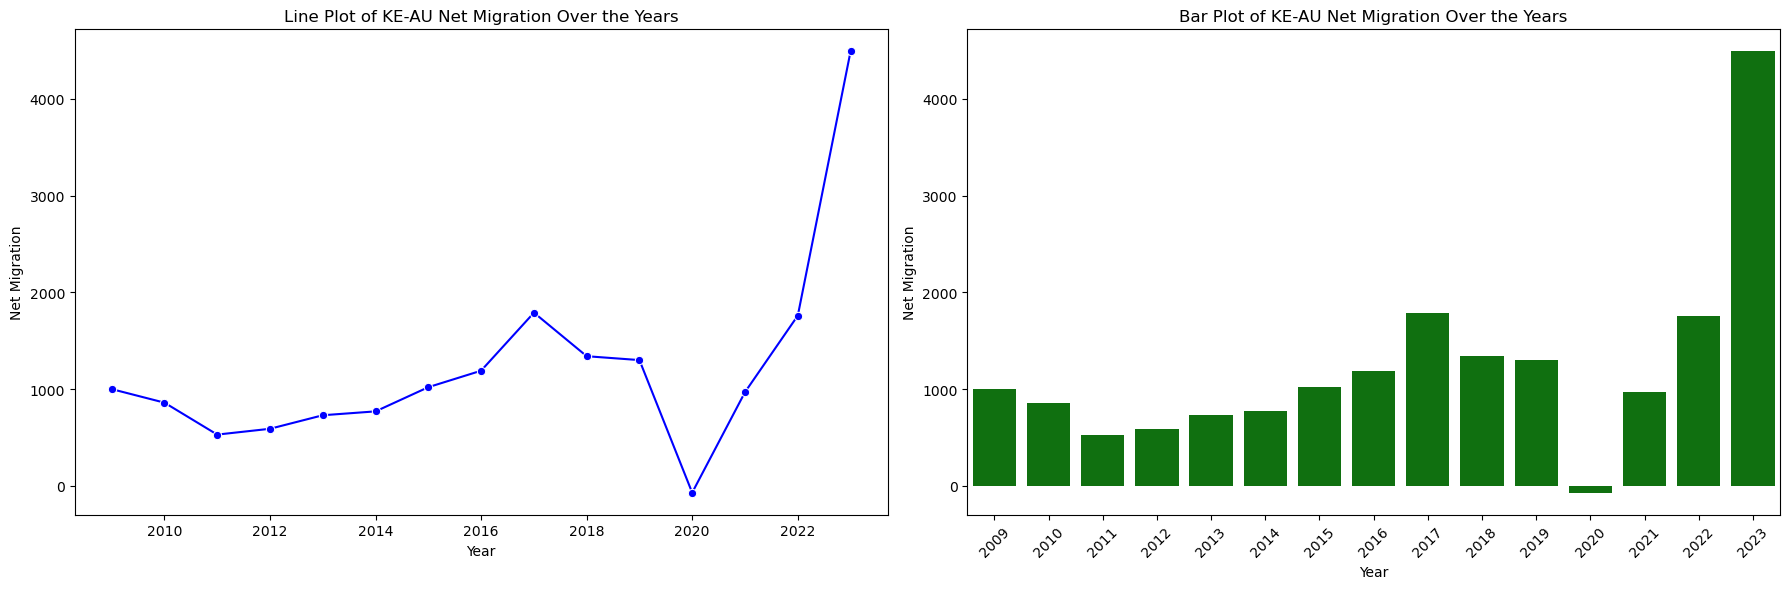

In [10]:
# Set up the matplotlib figure for side-by-side plots
plt.figure(figsize=(18, 6))

# Line Plot
plt.subplot(1, 2, 1)
sns.lineplot(x="Year", y="Net Migration", data=df, marker="o", color="blue")
plt.title("Line Plot of KE-AU Net Migration Over the Years")
plt.xlabel("Year")
plt.ylabel("Net Migration")

# Bar Plot
plt.subplot(1, 2, 2)
sns.barplot(x=df.Year.dt.year, y="Net Migration", data=df, color="green") # Use the year part of the datetime column
plt.title("Bar Plot of KE-AU Net Migration Over the Years")
plt.xlabel("Year")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylabel("Net Migration")

plt.tight_layout()
plt.show()

### Beuatifying the plots
- I beautify the plots by adding annotations, markers, titles, labels, and legends to the plots. I also change the color of the plots to make them more appealing.

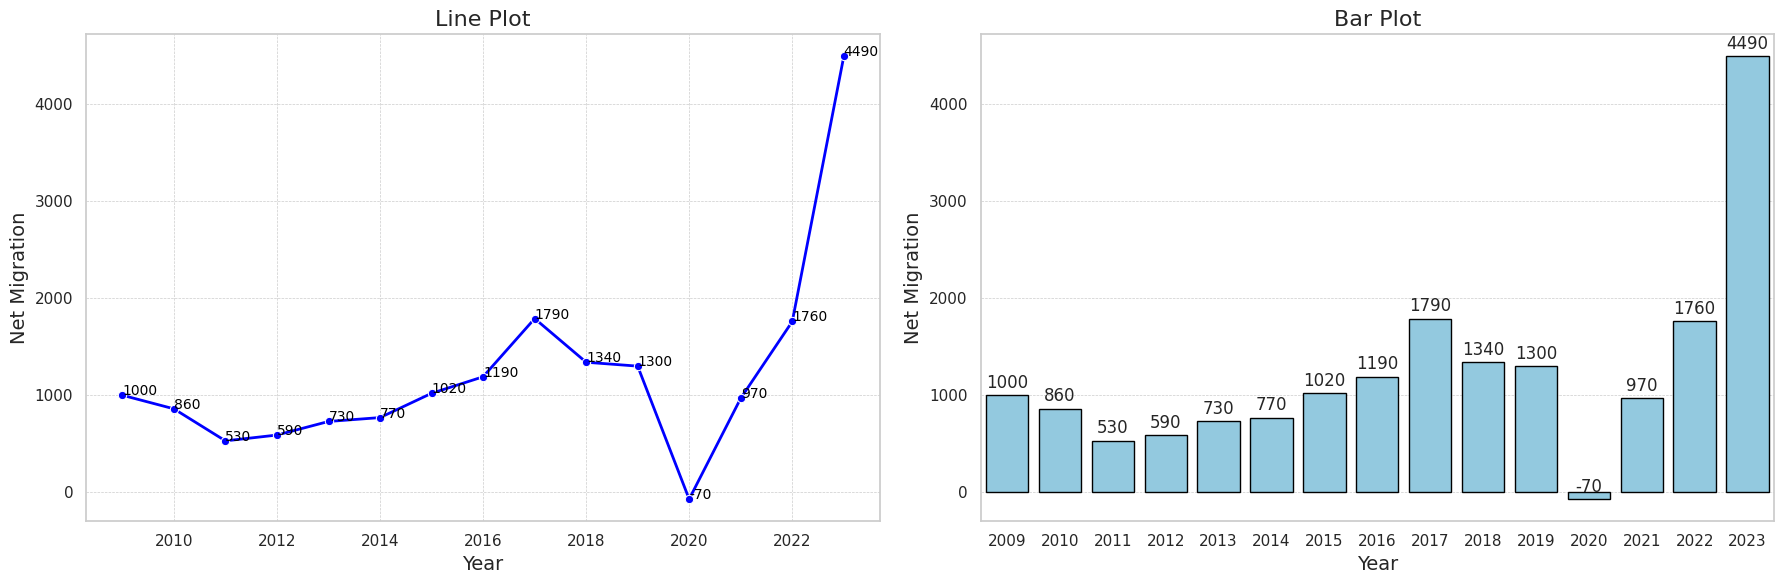

In [ ]:
# Enhancing the visualizations with annotations and improved aesthetics

plt.figure(figsize=(18, 6))

# Improved Line Plot
plt.subplot(1, 2, 1)
line_plot = sns.lineplot(
    x="Year",
    y="Net Migration",
    data=df,
    marker="o",
    color="blue",
    linestyle="-",
    linewidth=2,
)
plt.title("Line Plot", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Net Migration", fontsize=14)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Annotate each point on the line plot
for i in range(df.shape[0]):
    line_plot.text(
        df["Year"][i],
        df["Net Migration"][i],
        df["Net Migration"][i],
        horizontalalignment="left",
        size="small",
        color="black",
    )

# Improved Bar Plot
plt.subplot(1, 2, 2)
bar_plot = sns.barplot(
    x=df.Year.dt.year, y="Net Migration", data=df, color="skyblue", edgecolor="black"
)
plt.title("Bar Plot", fontsize=16)
plt.xlabel("Year", fontsize=14)
#plt.xticks(rotation=45)
plt.ylabel("Net Migration", fontsize=14)
plt.grid(True, which="both", linestyle="--", linewidth=0.5, axis="y")

# Annotate each bar in the bar plot
for p in bar_plot.patches:
    bar_plot.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 9),
        textcoords="offset points",
    )

plt.tight_layout()
plt.show()